In [1]:
import own_dbscan
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data from https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('.//data//creditcard.csv')
df.shape

(284807, 31)

In [3]:
# For example purpose, will only take 4 feature and 10k rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
col_name = list(df.columns[2:6])
df_new = df[col_name].copy()
df_new = df_new[:10000]

In [5]:
scaler = StandardScaler()
scaler.fit(df_new)
df_scaled_array = scaler.transform(df_new)
df_scaled_array

array([[-0.27118512,  1.40633482,  0.77299176, -0.24679022],
       [-0.01207745, -0.63824711,  0.12767871,  0.08996388],
       [-1.24007707,  0.74794464,  0.08023474, -0.38617705],
       ...,
       [ 0.35370831,  1.23247104, -0.46642505, -0.80552174],
       [ 0.91273226,  0.51881308, -0.64328811, -0.83758036],
       [ 0.91991428,  0.90798824,  1.61244433, -0.3869324 ]])

In [6]:
df_scaled = pd.DataFrame(df_scaled_array)
df_scaled.columns = col_name

In [7]:
df_scaled

,V2,V3,V4,V5
0,-0.271185,1.406335,0.772992,-0.246790
1,-0.012077,-0.638247,0.127679,0.089964
2,-1.240077,0.747945,0.080235,-0.386177
3,-0.357147,0.765013,-0.782312,0.030510
4,0.455470,0.554267,0.096371,-0.305015
...,...,...,...,...
9995,0.240106,-0.717921,1.580838,0.420233
9996,-0.177713,0.099931,0.084878,-0.783539
9997,0.353708,1.232471,-0.466425,-0.805522
9998,0.912732,0.518813,-0.643288,-0.837580


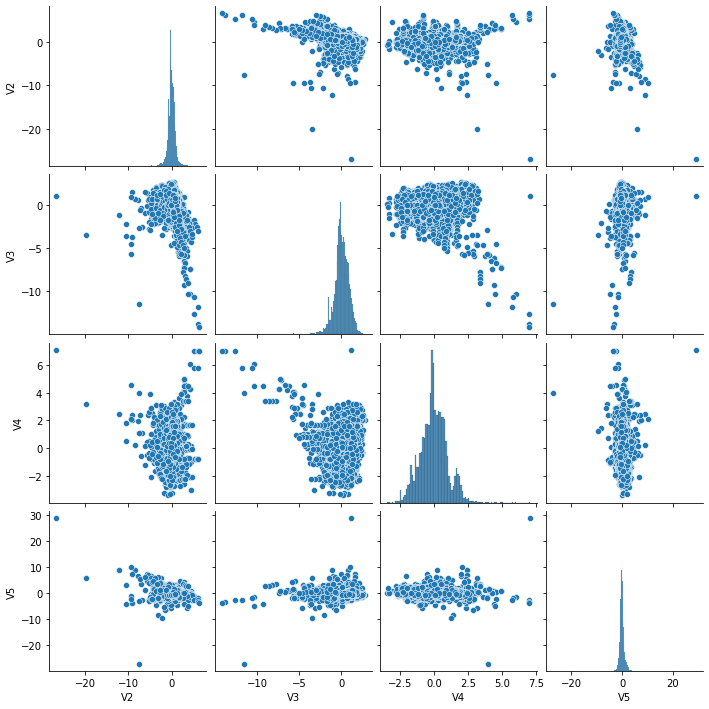

In [8]:
corr_plot = sns.pairplot(data= df_scaled)

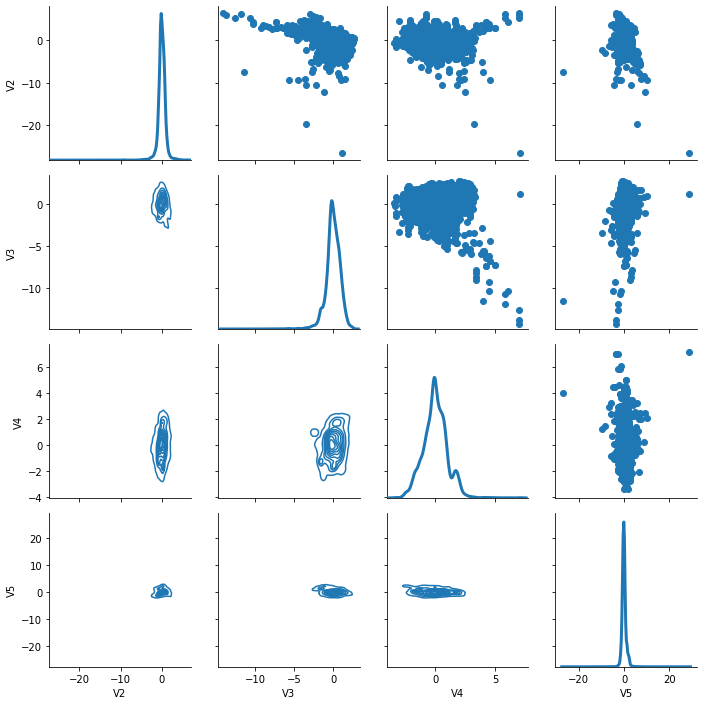

In [9]:
g = sns.PairGrid(df_scaled)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 3, legend = False)

In [10]:
print("Determine how many cluster and separation of clusters")
n_clus, max_sil, labels_true = own_dbscan.compute_silhouette(df_scaled, 20)

Determine how many cluster and separation of clusters
For n_clusters =  2 The average silhouette_score is :  0.2135041262480896
For n_clusters =  3 The average silhouette_score is :  0.2058144103650936
For n_clusters =  4 The average silhouette_score is :  0.2194098236657447
For n_clusters =  5 The average silhouette_score is :  0.2533272062726637
For n_clusters =  6 The average silhouette_score is :  0.26083340327125254
For n_clusters =  7 The average silhouette_score is :  0.24874751041805326
For n_clusters =  8 The average silhouette_score is :  0.2512854812392173
For n_clusters =  9 The average silhouette_score is :  0.25584931721114007
For n_clusters =  10 The average silhouette_score is :  0.2564483996207451
For n_clusters =  11 The average silhouette_score is :  0.26000626414446276
For n_clusters =  12 The average silhouette_score is :  0.2611394150876088
For n_clusters =  13 The average silhouette_score is :  0.2472964896744941
For n_clusters =  14 The average silhouette_score 

In [11]:
eps = list(np.linspace(1, 2.5, 15))
min_samples = list(np.arange(50, 250, 50))

In [12]:
df_results = own_dbscan.find_optimal(df_scaled, eps, min_samples, labels_true)

Loop through the EPS and min sample list to find optimal outlier size.

Iteration 1
eps=  1.0 min_samples =  50
Estimated number of clusters: 1
Estimated number of noise points 433
Homogeneity: 0.048
Completeness: 0.508
V-measure: 0.087
Adjusted Rand Index: 0.03
Percentage Outliers: 4.33 %


Iteration 2
eps=  1.0 min_samples =  100
Estimated number of clusters: 1
Estimated number of noise points 619
Homogeneity: 0.064
Completeness: 0.524
V-measure: 0.115
Adjusted Rand Index: 0.043
Percentage Outliers: 6.19 %


Iteration 3
eps=  1.0 min_samples =  150
Estimated number of clusters: 1
Estimated number of noise points 695
Homogeneity: 0.068
Completeness: 0.507
V-measure: 0.119
Adjusted Rand Index: 0.047
Percentage Outliers: 6.95 %


Iteration 4
eps=  1.0 min_samples =  200
Estimated number of clusters: 1
Estimated number of noise points 867
Homogeneity: 0.078
Completeness: 0.498
V-measure: 0.134
Adjusted Rand Index: 0.058
Percentage Outliers: 8.67 %


Iteration 5
eps=  1.1071428571428572 m

eps=  1.8571428571428572 min_samples =  200
Estimated number of clusters: 1
Estimated number of noise points 170
Homogeneity: 0.031
Completeness: 0.678
V-measure: 0.059
Adjusted Rand Index: 0.014
Percentage Outliers: 1.7 %


Iteration 37
eps=  1.9642857142857142 min_samples =  50
Estimated number of clusters: 1
Estimated number of noise points 103
Homogeneity: 0.022
Completeness: 0.737
V-measure: 0.043
Adjusted Rand Index: 0.008
Percentage Outliers: 1.03 %


Iteration 38
eps=  1.9642857142857142 min_samples =  100
Estimated number of clusters: 1
Estimated number of noise points 129
Homogeneity: 0.025
Completeness: 0.691
V-measure: 0.049
Adjusted Rand Index: 0.01
Percentage Outliers: 1.29 %


Iteration 39
eps=  1.9642857142857142 min_samples =  150
Estimated number of clusters: 1
Estimated number of noise points 149
Homogeneity: 0.028
Completeness: 0.682
V-measure: 0.054
Adjusted Rand Index: 0.012
Percentage Outliers: 1.49 %


Iteration 40
eps=  1.9642857142857142 min_samples =  200
Est

In [13]:
df_results.sort_values('num_error', ascending = False)

,iteration,eps,min_samples,error,num_error,n_clusters
0,4,1.000000,200,0.0867,867,1.0
0,3,1.000000,150,0.0695,695,1.0
0,8,1.107143,200,0.0662,662,1.0
0,2,1.000000,100,0.0619,619,1.0
0,7,1.107143,150,0.0537,537,1.0
0,6,1.107143,100,0.0479,479,1.0
0,12,1.214286,200,0.0478,478,1.0
0,1,1.000000,50,0.0433,433,1.0
0,11,1.214286,150,0.0427,427,1.0
0,16,1.321429,200,0.0383,383,1.0


In [14]:
eps = 3
min_samples = 50
model = own_dbscan.model_generation(df_scaled, eps, min_samples, labels_true)

Selecting EPS: 3, min_samples: 50
Running model with defined param.
eps=  3 min_samples =  50
Estimated number of clusters: 1
Estimated number of noise points 50
Homogeneity: 0.014
Completeness: 0.842
V-measure: 0.028
Adjusted Rand Index: 0.004
Percentage Outliers: 0.5 %



In [15]:
unique, counts = np.unique(model.labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[  -1,   50],
       [   0, 9950]], dtype=int64)

In [16]:
sample = df_scaled.copy()

In [17]:
sample['label'] = list(model.labels_)
sample['label'] = np.where(sample['label'] > -1, 'label', 'outlier')

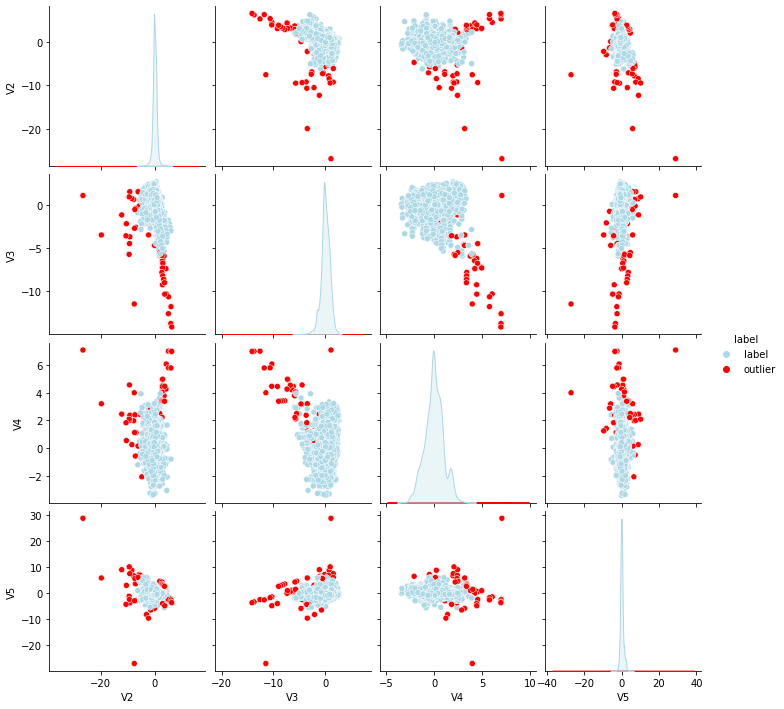

In [18]:
outlier_plot = sns.pairplot(data = sample
                            , palette = ['lightblue', 'Red']
                            , hue = 'label', vars = col_name)

In [19]:
df_scaled

,V2,V3,V4,V5
0,-0.271185,1.406335,0.772992,-0.246790
1,-0.012077,-0.638247,0.127679,0.089964
2,-1.240077,0.747945,0.080235,-0.386177
3,-0.357147,0.765013,-0.782312,0.030510
4,0.455470,0.554267,0.096371,-0.305015
...,...,...,...,...
9995,0.240106,-0.717921,1.580838,0.420233
9996,-0.177713,0.099931,0.084878,-0.783539
9997,0.353708,1.232471,-0.466425,-0.805522
9998,0.912732,0.518813,-0.643288,-0.837580


In [20]:
sample[sample['label'] != 'label']

,V2,V3,V4,V5,label
164,-9.476655,-5.695165,2.102636,-1.155990,outlier
210,-4.750242,-0.977979,-2.082637,6.525571,outlier
1388,-3.021595,-2.036147,1.412472,-8.202922,outlier
1632,-7.564311,-11.470849,3.989277,-27.091364,outlier
2178,-9.202024,-3.657655,2.365519,-3.730893,outlier
2453,-6.902199,-2.557299,1.106598,-2.795394,outlier
2464,-12.243137,-1.106676,2.448346,9.050019,outlier
2622,-2.256203,-3.439235,1.234699,-9.612571,outlier
2792,-7.814943,0.687725,1.964254,6.742478,outlier
4235,-8.451473,0.800284,0.241644,8.849764,outlier
